In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SET & RESET

In [139]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [ ]:
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_colwidth')

In [2]:
# Mounting google drive account in colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/gurgaon_real_estate_cleaned_ver2.csv')

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.26,7403.0,1702.0,super built up area 1702(158.12 sq.m.)carpet a...,3,3,3,...,1702.0,NaN,1500.0,0,0,0,0,1,1,28
1,flat,tulip violet,sector 69,1.72,8730.0,1970.0,super built up area 1970(183.02 sq.m.),4,4,1,...,1970.0,NaN,NaN,0,0,0,0,0,0,86
2,flat,experion the heartsong,sector 108,2.28,8204.0,2779.0,super built up area 2779(258.18 sq.m.),4,5,3+,...,2779.0,NaN,NaN,0,0,0,0,0,0,101
3,flat,signature global city 92,sector 92,0.78,8047.0,969.0,super built up area 1197(111.2 sq.m.),2,2,2,...,1197.0,NaN,NaN,0,0,0,0,0,1,47
4,flat,puri diplomatic greens,sector 111,3.45,11694.0,2950.0,super built up area 2950(274.06 sq.m.),4,5,3+,...,2949.0,NaN,NaN,0,1,0,0,0,0,101


In [10]:
df.shape

(3813, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3817 non-null   object 
 1   society             3816 non-null   object 
 2   sector              3817 non-null   object 
 3   price               3817 non-null   float64
 4   price_per_sqft      3817 non-null   float64
 5   area                3817 non-null   float64
 6   areaWithType        3817 non-null   object 
 7   bedRoom             3817 non-null   int64  
 8   bathroom            3817 non-null   int64  
 9   balcony             3817 non-null   object 
 10  floorNum            3796 non-null   float64
 11  facing              3817 non-null   object 
 12  agePossession       3817 non-null   object 
 13  super_builtup_area  1894 non-null   float64
 14  builtup_area        1799 non-null   float64
 15  carpet_area         1921 non-null   float64
 16  study 

In [8]:
df.duplicated().sum()

4

In [9]:
df.drop_duplicates(inplace=True) #dropping duplicates

# **property_type**

<Axes: xlabel='property_type'>

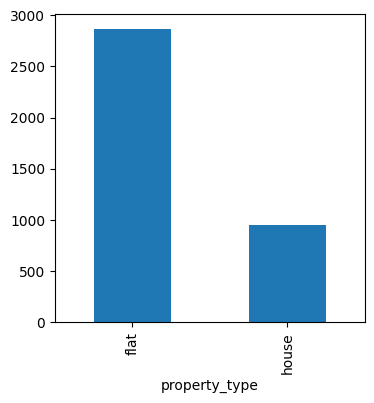

In [11]:
df['property_type'].value_counts().plot(kind='bar',figsize=(4,4))

In [12]:
df['property_type'].value_counts()/df['property_type'].value_counts().sum()

property_type
flat     0.752164
house    0.247836
Name: count, dtype: float64

## observation of property_type

-  'flat' property type is a 75% of whole data
-  No missing values

# **society**

In [13]:
df['society'].value_counts() # high cardinality(high number of classes)

society
independent                             562
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
micasa sec 68                             1
prem kunj                                 1
pgr shree kripaluji apartment             1
511 sarahah tower                         1
huda housing board society                1
Name: count, Length: 723, dtype: int64

In [15]:
df['society'].nunique() #722 unique societies (independent houses excluded)

723

In [16]:
(df['society'].value_counts()/df['society'].value_counts().sum())*100

# independent houses have ~15% of total property listings

society
independent                             14.742917
tulip violet                             1.967471
ss the leaf                              1.915005
shapoorji pallonji joyville gurugram     1.101784
dlf new town heights                     1.101784
                                          ...    
micasa sec 68                            0.026233
prem kunj                                0.026233
pgr shree kripaluji apartment            0.026233
511 sarahah tower                        0.026233
huda housing board society               0.026233
Name: count, Length: 723, dtype: float64

<Axes: ylabel='society'>

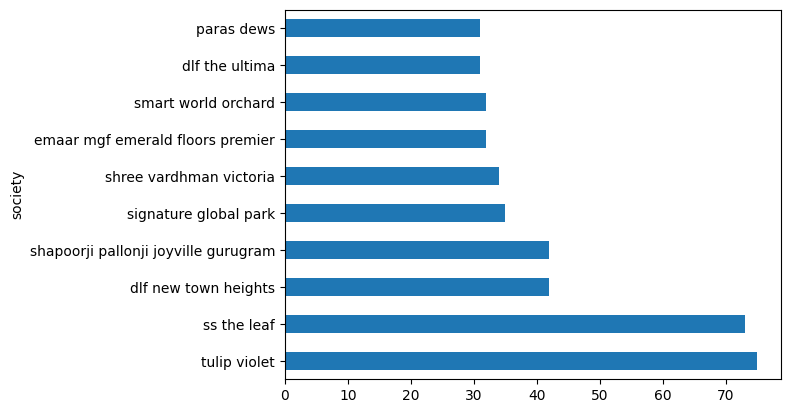

In [17]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='barh')

In [18]:
soc_count = df[df['society'] != 'independent']['society'].value_counts(ascending=True) #excluding independent houses

In [19]:
soc_count.sum()

3250

In [20]:
(soc_count.sort_values(ascending=False).cumsum().head(75)/soc_count.sum())*100  #out of total properties in all societies,top ~75 societies have ~50% of property listings and rest ~675 societies have rest 50% properties

society
tulip violet                             2.307692
ss the leaf                              4.553846
dlf new town heights                     5.846154
shapoorji pallonji joyville gurugram     7.138462
signature global park                    8.215385
                                          ...    
puri emerald bay                        48.000000
dlf the primus                          48.400000
indiabulls enigma                       48.800000
mvn athens                              49.169231
ireo the corridors                      49.538462
Name: count, Length: 75, dtype: float64

In [21]:
soc_count.reset_index()

,society,count
0,huda housing board society,1
1,mrg world ultimus,1
2,south city 1 floors,1
3,imt view society,1
4,park view apartment,1
...,...,...
717,signature global park,35
718,shapoorji pallonji joyville gurugram,42
719,dlf new town heights,42
720,ss the leaf,73


In [22]:
soc_count.reset_index().groupby('count').count() #gives the number of societies with a particular count of property listings

# 342 societies have a count of only one property listings
# 33 societies have a count of 4 property listings

,society
count,
1,342
2,104
3,61
4,33
5,27
6,22
7,16
8,13
9,10


<Axes: xlabel='society'>

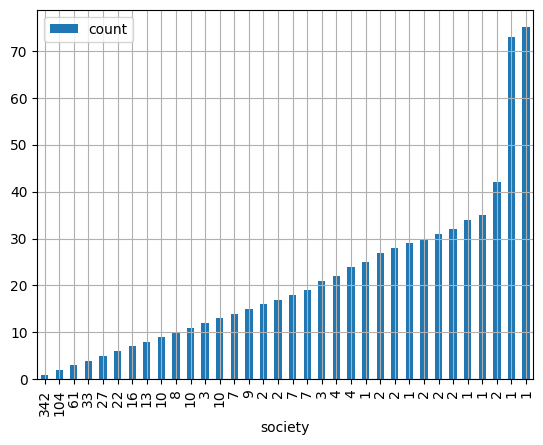

In [23]:
soc_count.reset_index().groupby('count').count().reset_index().plot(kind='bar',x='society',y='count',grid=True)

# some interpretations
# 1) only 3 societies have property listings of more than 40
# 2) 342+ societies have property listing around 1

In [24]:
df['society'].isnull().sum()

1

In [25]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_builtup_area,builtup_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2395,flat,NaN,sector 78,0.6,3692.0,1625.0,built up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


## observations of society feature



1.   About ~15% of the properties are independent houses
2.   Out of total properties in all societies(excluding 'independent house') :
     *   top ~75 of the societies have around 50% of the total prop listings
3.   only 3 societies have property listings of more than 40(excluding 'independent house')
4.   342+ societies have property listing around 1
5.   One missing value present



   










# **sector**

In [26]:
df['sector'].isnull().sum()

0

In [36]:
df['sector'].value_counts()

sector
sohna road                                   156
sector 85                                    108
sector 102                                   107
sector 92                                    101
sector 69                                     93
sector 90                                     89
sector 65                                     87
sector 81                                     87
sector 109                                    86
sector 79                                     77
sector 104                                    75
sector 2                                      72
sector 83                                     68
sector 50                                     63
sector 37d                                    63
sector 86                                     63
sector 107                                    60
sector 108                                    58
sector 56                                     56
sector 48                                     56
sector 70a   

In [28]:
df['sector'].value_counts().shape  #no. of sectors

(189,)

<Axes: ylabel='sector'>

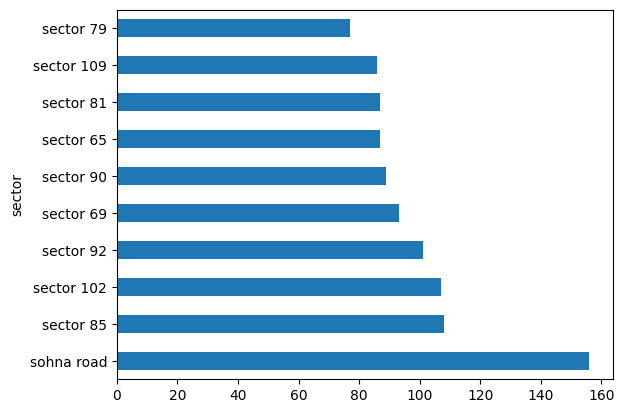

In [29]:
df['sector'].value_counts().head(10).plot(kind='barh')

In [35]:
(df['sector'].value_counts()/df['sector'].value_counts().sum())*100

sector
sohna road                                   4.091267
sector 85                                    2.832415
sector 102                                   2.806189
sector 92                                    2.648833
sector 69                                    2.439024
sector 90                                    2.334120
sector 65                                    2.281668
sector 81                                    2.281668
sector 109                                   2.255442
sector 79                                    2.019407
sector 104                                   1.966955
sector 2                                     1.888277
sector 83                                    1.783373
sector 50                                    1.652242
sector 37d                                   1.652242
sector 86                                    1.652242
sector 107                                   1.573564
sector 108                                   1.521112
sector 56            

In [64]:
(df['sector'].value_counts().sort_values(ascending=False).cumsum().head(80)/df['sector'].value_counts().sum())*100

# top ~25 out of 189 sectors have property listings around ~50%

sector
sohna road               4.091267
sector 85                6.923682
sector 102               9.729871
sector 92               12.378704
sector 69               14.817729
sector 90               17.151849
sector 65               19.433517
sector 81               21.715185
sector 109              23.970627
sector 79               25.990034
sector 104              27.956989
sector 2                29.845266
sector 83               31.628639
sector 86               33.280881
sector 50               34.933124
sector 37d              36.585366
sector 107              38.158930
sector 108              39.680042
sector 56               41.148702
sector 48               42.617362
sector 70a              44.033569
sector 95               45.449777
sector 49               46.865985
sector 43               48.255966
sector 26               49.645948
sector 37c              51.035930
sector 67               52.399685
sector 70               53.710989
sector 84               54.996066
sector 

<Axes: xlabel='sector'>

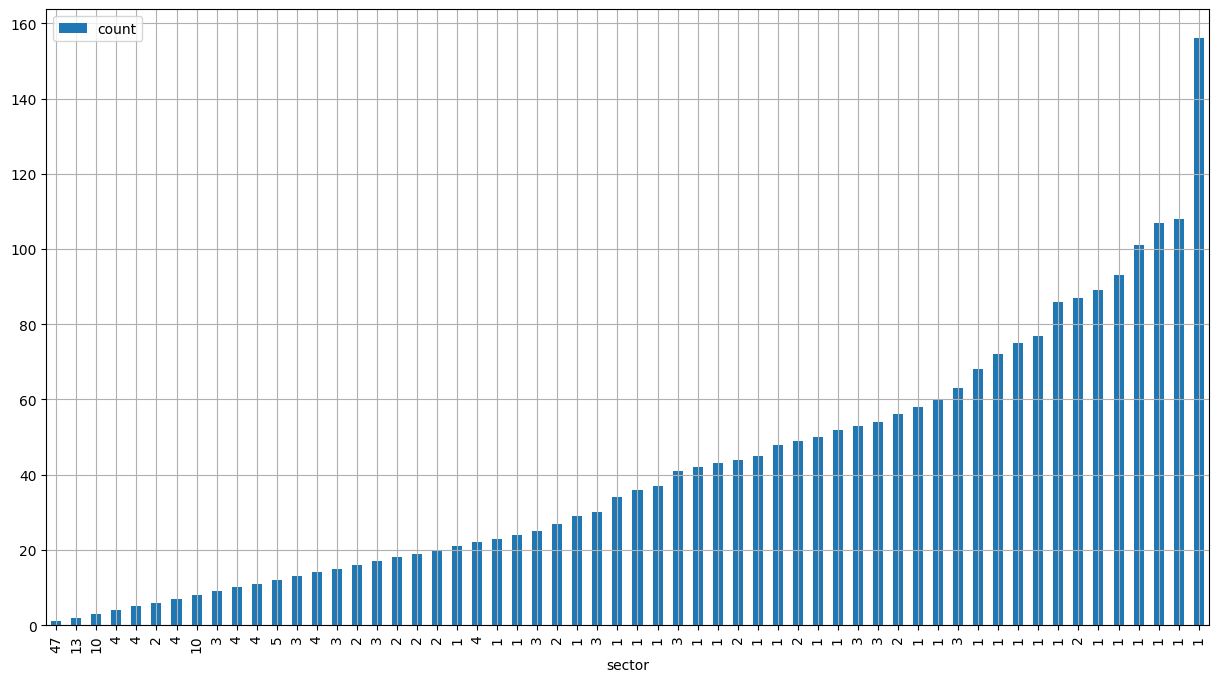

In [32]:
df['sector'].value_counts().reset_index().groupby('count').count().reset_index().plot(kind='bar',x='sector',y='count',grid=True,figsize=(15,8))

In [ ]:
# only 1 sector has more than 150 property listings
# 4 sectors have property listings more than 100
# 60 sectors have only 1 to 2 property listing

In [59]:
df['sector'].value_counts()[df['sector'].value_counts() == 1].count()

# 47 sectors hve only one property listing

47

In [44]:
df['sector'].value_counts()[df['sector'].value_counts() == 2].count()

13

In [55]:
(df['sector'].value_counts().sort_values(ascending=True).cumsum().head(100)/df['sector'].value_counts().sum())*100

sector
khandsa                                      0.026226
saroop garden sector 105                     0.052452
sector 21a faridabad                         0.078678
civil l                                      0.104904
bhora kalan                                  0.131130
sector 4, railway road,                      0.157356
sector-7 hous                                0.183582
b1 block sector 57                           0.209809
block h sector 3 phase iii extension         0.236035
sec 3 bhim vihar part 1 bhimgher sector 3    0.262261
sector 9b                                    0.288487
sector 99A                                   0.314713
ansal's sector 2                             0.340939
huda sector 28                               0.367165
sector 10                                    0.393391
sector 37b                                   0.419617
sector 5 chowk                               0.445843
mahasector 11, rajendra place                0.472069
sector 37D           

In [77]:
df['sector'].value_counts()[(df['sector'].value_counts() > 20) & (df['sector'].value_counts() < 100)].count()

54

## observations of sector feature



1.   
2.   Out of total properties in all sectors :
     *   top ~25 sectors have around 50% of the total prop listings
     *   top ~80 sectors have around 90% of total prop listings
3.   Only 1 sector have property listings of more than 150
4.   60 sectors(around ~32%) have property listings from 1 to 2 each
5.   54 sectors(around ~29%) have property listings from 20 to 100 each
6.   Only 4 sectors have property listings more than 100 each
7.   Bottom 100 sectors have property listings of only ~8% of the total



   










<Axes: xlabel='sector'>

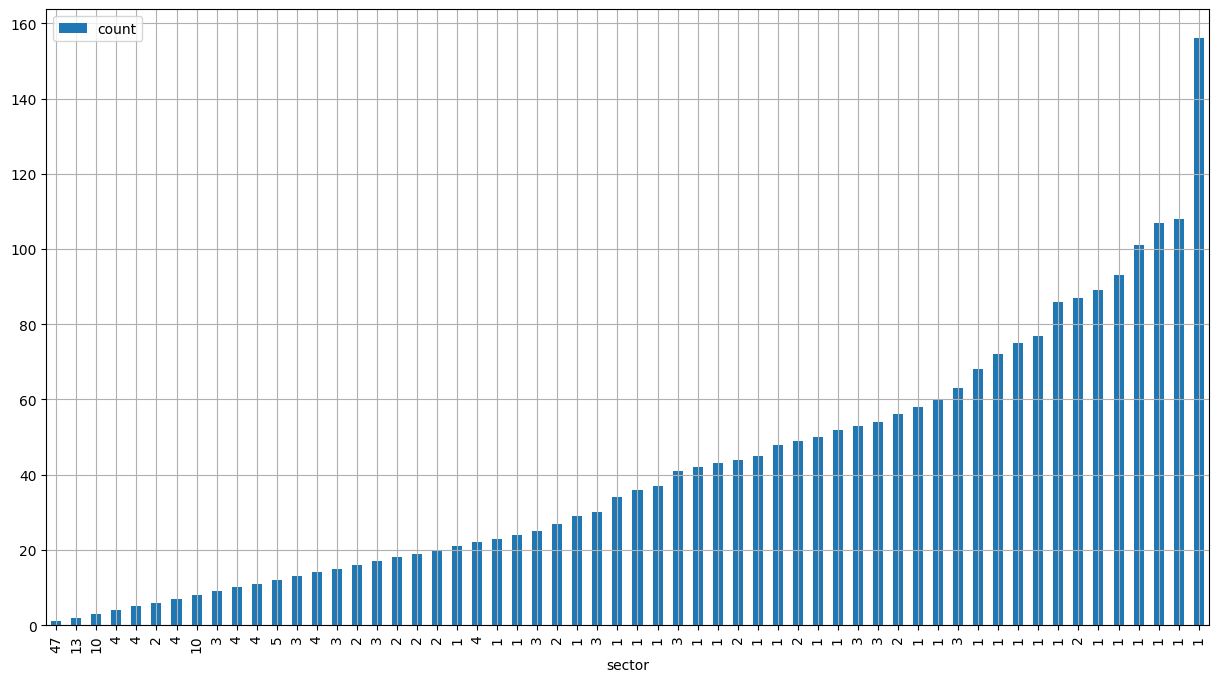

In [69]:
df['sector'].value_counts().reset_index().groupby('count').count().reset_index().plot(kind='bar',x='sector',y='count',grid=True,figsize=(15,8))

# **price**

In [78]:
df['price'].isnull().sum()

0

In [141]:
df['price'].value_counts().sum()

3813

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3813 entries, 0 to 3816
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   property_type       3813 non-null   object 
 1   society             3812 non-null   object 
 2   sector              3813 non-null   object 
 3   price               3813 non-null   float64
 4   price_per_sqft      3813 non-null   float64
 5   area                3813 non-null   float64
 6   areaWithType        3813 non-null   object 
 7   bedRoom             3813 non-null   int64  
 8   bathroom            3813 non-null   int64  
 9   balcony             3813 non-null   object 
 10  floorNum            3792 non-null   float64
 11  facing              3813 non-null   object 
 12  agePossession       3813 non-null   object 
 13  super_builtup_area  1893 non-null   float64
 14  builtup_area        1797 non-null   float64
 15  carpet_area         1919 non-null   float64
 16  study room 

In [79]:
df['price'].describe()

count    3813.000000
mean        2.502258
std         2.952371
min         0.070000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

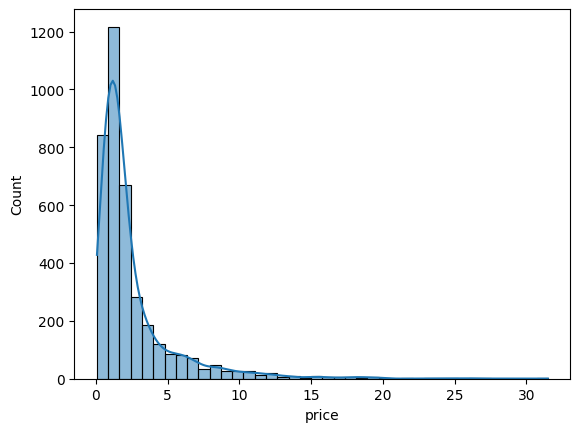

In [93]:
sns.histplot(df['price'],bins=40,kde=True)

In [105]:
import plotly.express as px

In [107]:
fig = px.box(df['price'],orientation='h')

In [108]:
fig.show()

In [132]:
fig1 = px.histogram(df['price'],nbins=40,marginal='rug')
fig1.update_layout(bargap=0.05)

## Descriptive statistics of 'price' feature



*   Count: 3813 entries of price
*   Mean Price: 2.5 Cr
*   Median Price(50th percentile): 1.5 Cr
- Standard Deviation: 2.95 Cr, which represents variability in price values
- Price Range: min of 0.07 Cr to max of 31.5 crore
- IQR Range(diff of 75th and 25th percentile): 0.92 Cr to 2.7 Cr (middle 50% of the values lie in this range)
- No missing values found


















## Visualization

- Histogram indicates that most of the properties are priced below 5 Cr and few properties are priced above 9 Cr
- Box plot indicates significant number of outliers on the higher side of 'price'
- Kde plot indicates Right-skewed data of price implying majority of properties on lower end and few high priced properties

In [142]:
df['price'].kurt()

15.156548067630554

- Kurtosis of 15 is way higher than 3 indicating heavier tails .i.e significant number of outliers

In [143]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.490
0.99    15.088
Name: price, dtype: float64

- 1% of the prop priced below 0.25 Cr
- 5% of the prop priced below 0.37 Cr
- 95% of the prop priced below 8.5 Cr
- 99% of the prop priced below 15 Cr

In [144]:
# Outlier detection using IQR method

Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.7800000000000002

In [145]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000004 5.370000000000001


In [146]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(439, 23)

In [147]:
outliers['price'].describe()

count    439.000000
mean       9.164556
std        4.049009
min        5.400000
25%        6.350000
50%        8.000000
75%       10.550000
max       31.500000
Name: price, dtype: float64

In [161]:
fig1 = px.histogram(outliers['price'],nbins=10,marginal='rug')
fig1.update_layout(bargap=0.05)

- 70% of the outlier values lie between 5 to 10 Cr values

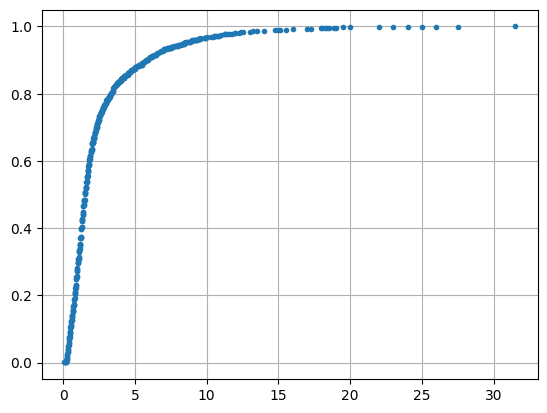

In [164]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

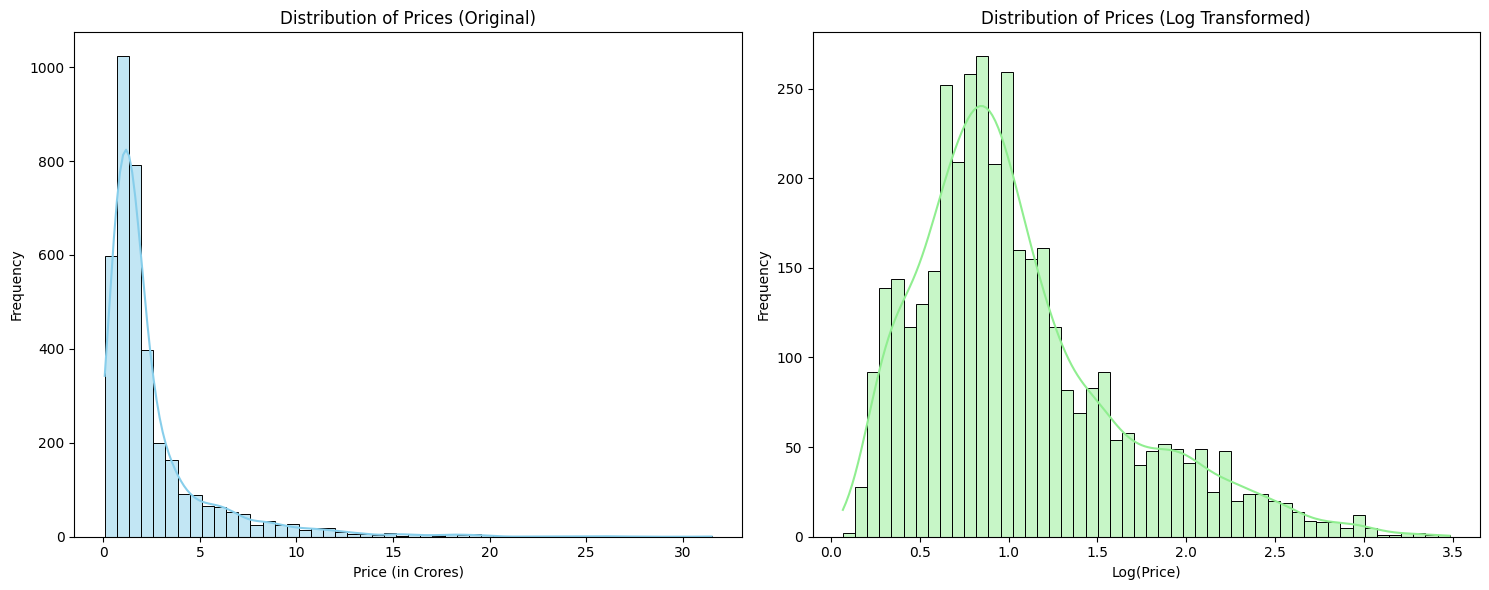

In [165]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [166]:
np.log1p(df['price']).kurt()

0.9699016095316586

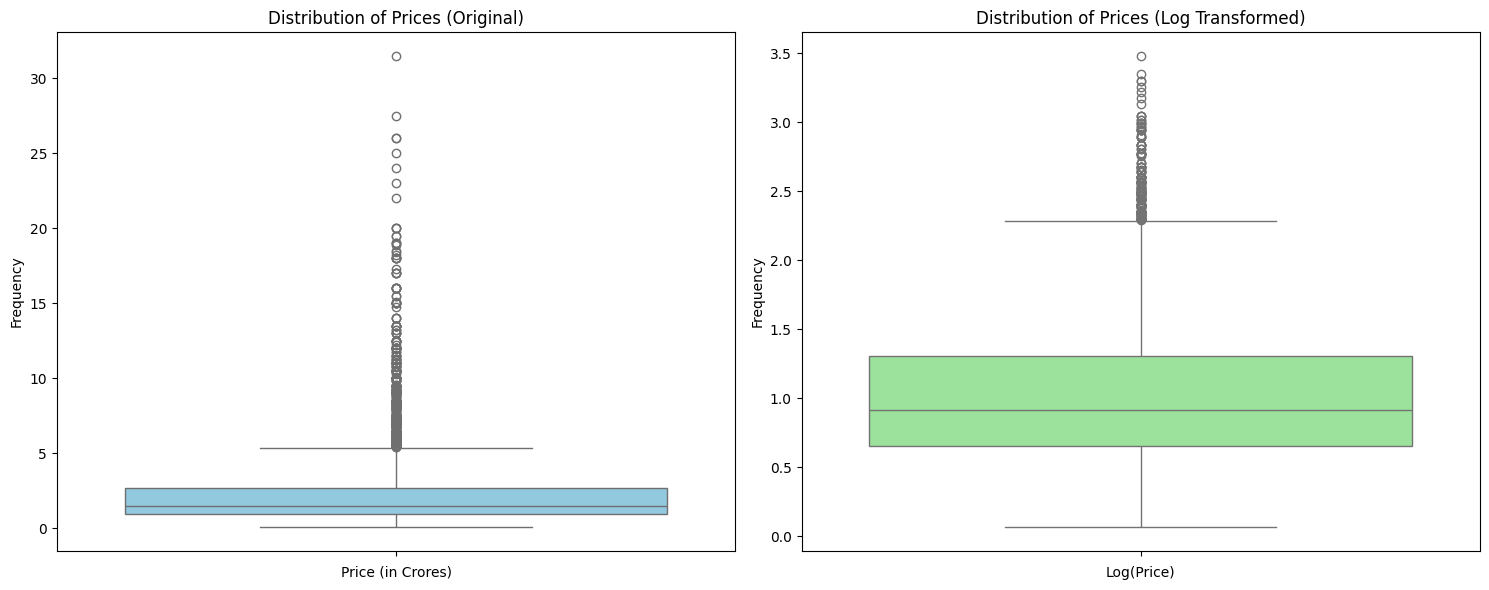

In [167]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- Data became more towards normal dist after log transformation, reducing the skewness and kurtosis.
- Number of outliers are also reduced

# price per sqft

In [168]:
df['price_per_sqft'].isnull().sum()

0

In [171]:
df['price_per_sqft'].describe()

count      3813.000000
mean      14012.019145
std       23344.201645
min           2.000000
25%        6806.000000
50%        9011.000000
75%       13875.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [174]:
fig1 = px.histogram(df['price_per_sqft'],nbins=15,marginal='rug')
fig1.update_layout(bargap=0.05)

In [178]:
fig = px.box(df['price_per_sqft'],orientation='h')
fig.show()

## observation on price per sqft

- Large number of potential oultiers
- Few potential outliers on lower end
- Very narrow IQR range
- Right skewed data
- 98% of the values are within ₹0 to ₹50k range
- No missing value

# bed Room

In [179]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

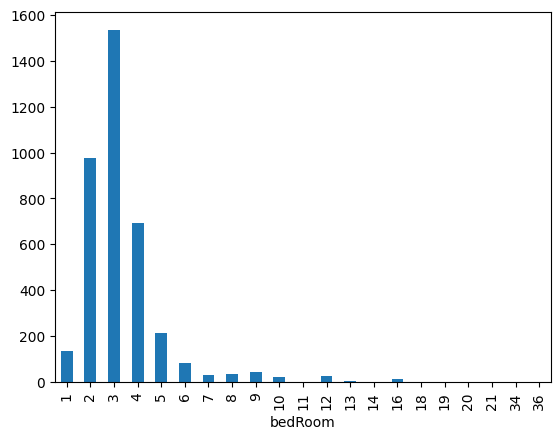

In [180]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='count'>

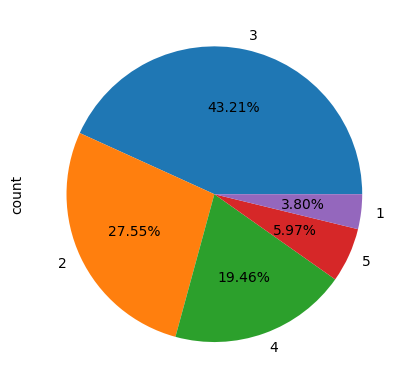

In [186]:
df['bedRoom'].value_counts().head().plot(kind='pie',autopct='%0.2f%%')

# bath Room

In [188]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

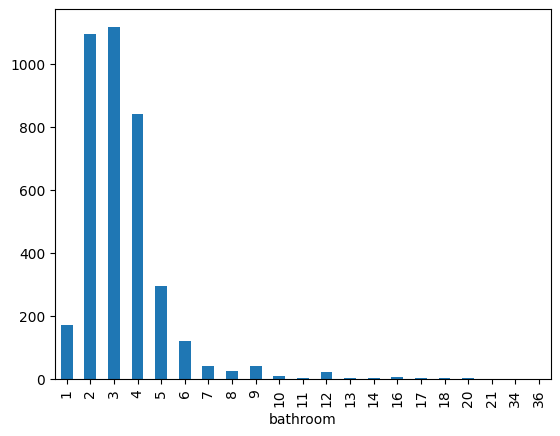

In [189]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

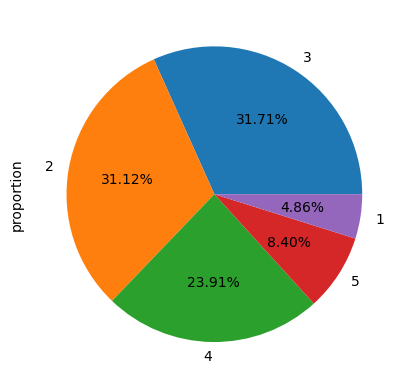

In [190]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# balcony

In [191]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

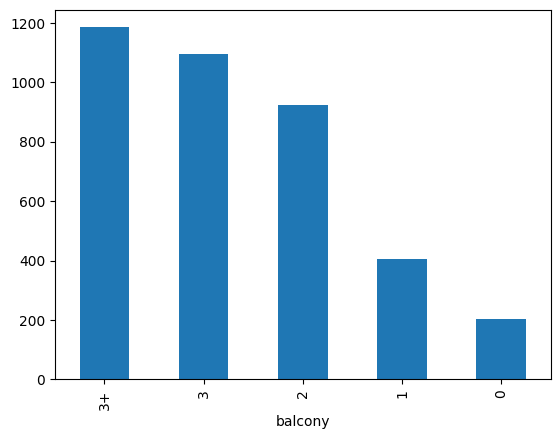

In [192]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

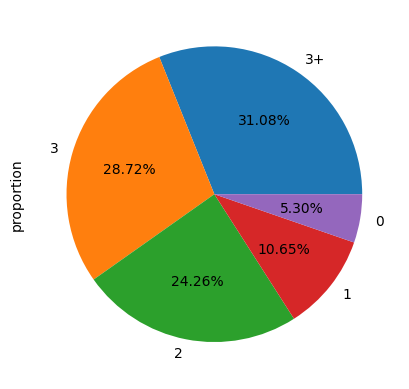

In [193]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# floor number

In [198]:
df['floorNum'].isnull().sum()

21

In [199]:
df['floorNum'].describe()

count    3792.000000
mean        6.670359
std         5.999911
min         0.000000
25%         2.000000
50%         4.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

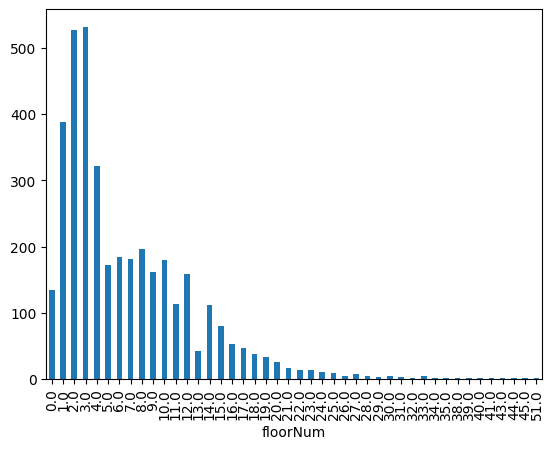

In [200]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

In [211]:
fig1 = px.histogram(df['floorNum'],nbins=3,marginal='rug')
fig1.update_layout(bargap=0.05)

In [213]:
fig = px.box(df['floorNum'],orientation='h')
fig.show()

# Observation of floorNum

- Majority of the properties are between 0th to 20th floor
- Floors 2 to 5 are most frequent
- IQR range from 2nd to 10th floor indicating middle 50% of the properties in this range
- Right skewed indicating majority of the properties on the lower end
- Box plot also indicating potential outliers on higher end

# facing

In [214]:
df['facing'].isnull().sum()

0

In [215]:
df['facing'].value_counts()

facing
not available    1109
East              646
North-East        644
North             397
West              250
South             234
North-West        198
South-East        180
South-West        155
Name: count, dtype: int64

# agepossession

In [196]:
df['agePossession'].isnull().sum()

0

In [197]:
df['agePossession'].value_counts()

agePossession
Relatively New        1668
New Property           610
Moderately Old         592
Old Property           344
Undefined              330
Under Construction     269
Name: count, dtype: int64

## areas

In [230]:
# super built up

df['super_builtup_area'].isnull().sum()

1920

In [231]:
df['super_builtup_area'].dropna().value_counts().sum()

1893

In [218]:
df['super_builtup_area'].describe()

count    1893.000000
mean     1924.752985
std       760.139031
min       325.000000
25%      1479.000000
50%      1828.000000
75%      2215.000000
max      9997.000000
Name: super_builtup_area, dtype: float64

In [228]:
fig1 = px.histogram(df['super_builtup_area'].dropna(),nbins=10,marginal='rug')
fig1.update_layout(bargap=0.05)

In [232]:
fig = px.box(df['super_builtup_area'],orientation='h')
fig.show()

## observations on super builtup area

- Majority of the properties are in the range 500 to 3500 sqft area
- Right Skewed data
- IQR range is in between 1,478 and 2215 sqft area implying middle 50% values lie in this range
- Potential outliers in both high and lower end

In [234]:
# built up area

df['builtup_area'].isnull().sum()

2016

In [235]:
df['builtup_area'].describe()

count    1.797000e+03
mean     7.319351e+03
std      2.061306e+05
min      4.500000e+01
25%      1.170000e+03
50%      1.700000e+03
75%      2.430000e+03
max      8.708843e+06
Name: builtup_area, dtype: float64

In [243]:
fig1 = px.histogram(df['builtup_area'].dropna(),nbins=50,marginal='rug')
fig1.update_layout(bargap=0.05)

In [258]:
fig = px.box(df['builtup_area'].dropna(),orientation='h')
fig.show()

- IQR range is from 1170 to 2430 sqft indicating middle 50% values falling
in this range
- Potential outlier on either end especially on the higher end
- Extreme values on either end need investigation since they may be outliers due to properties being a mansion or some commercial property or it can be data error

In [248]:
# carpet area

df['carpet_area'].isnull().sum()

1894

In [249]:
df['carpet_area'].describe()

count      1919.000000
mean       2772.284002
std       22753.433633
min          15.000000
25%         900.000000
50%        1345.000000
75%        1800.000000
max      607716.000000
Name: carpet_area, dtype: float64

In [256]:
fig1 = px.histogram(df['carpet_area'].dropna(),nbins=120,marginal='rug')
fig1.update_layout(bargap=0.05)

In [257]:
fig = px.box(df['carpet_area'].dropna(),orientation='h')
fig.show()

- IQR range is from 900 to 1800 sqft indicating middle 50% values falling
in this range
- Majority of the properties are between 0 to 10k sqft
- Potential outlier on either end especially on the higher end
- Extreme values on either end need investigation since they may be outliers due to properties being a mansion or some commercial property or it can be data error

# additional rooms

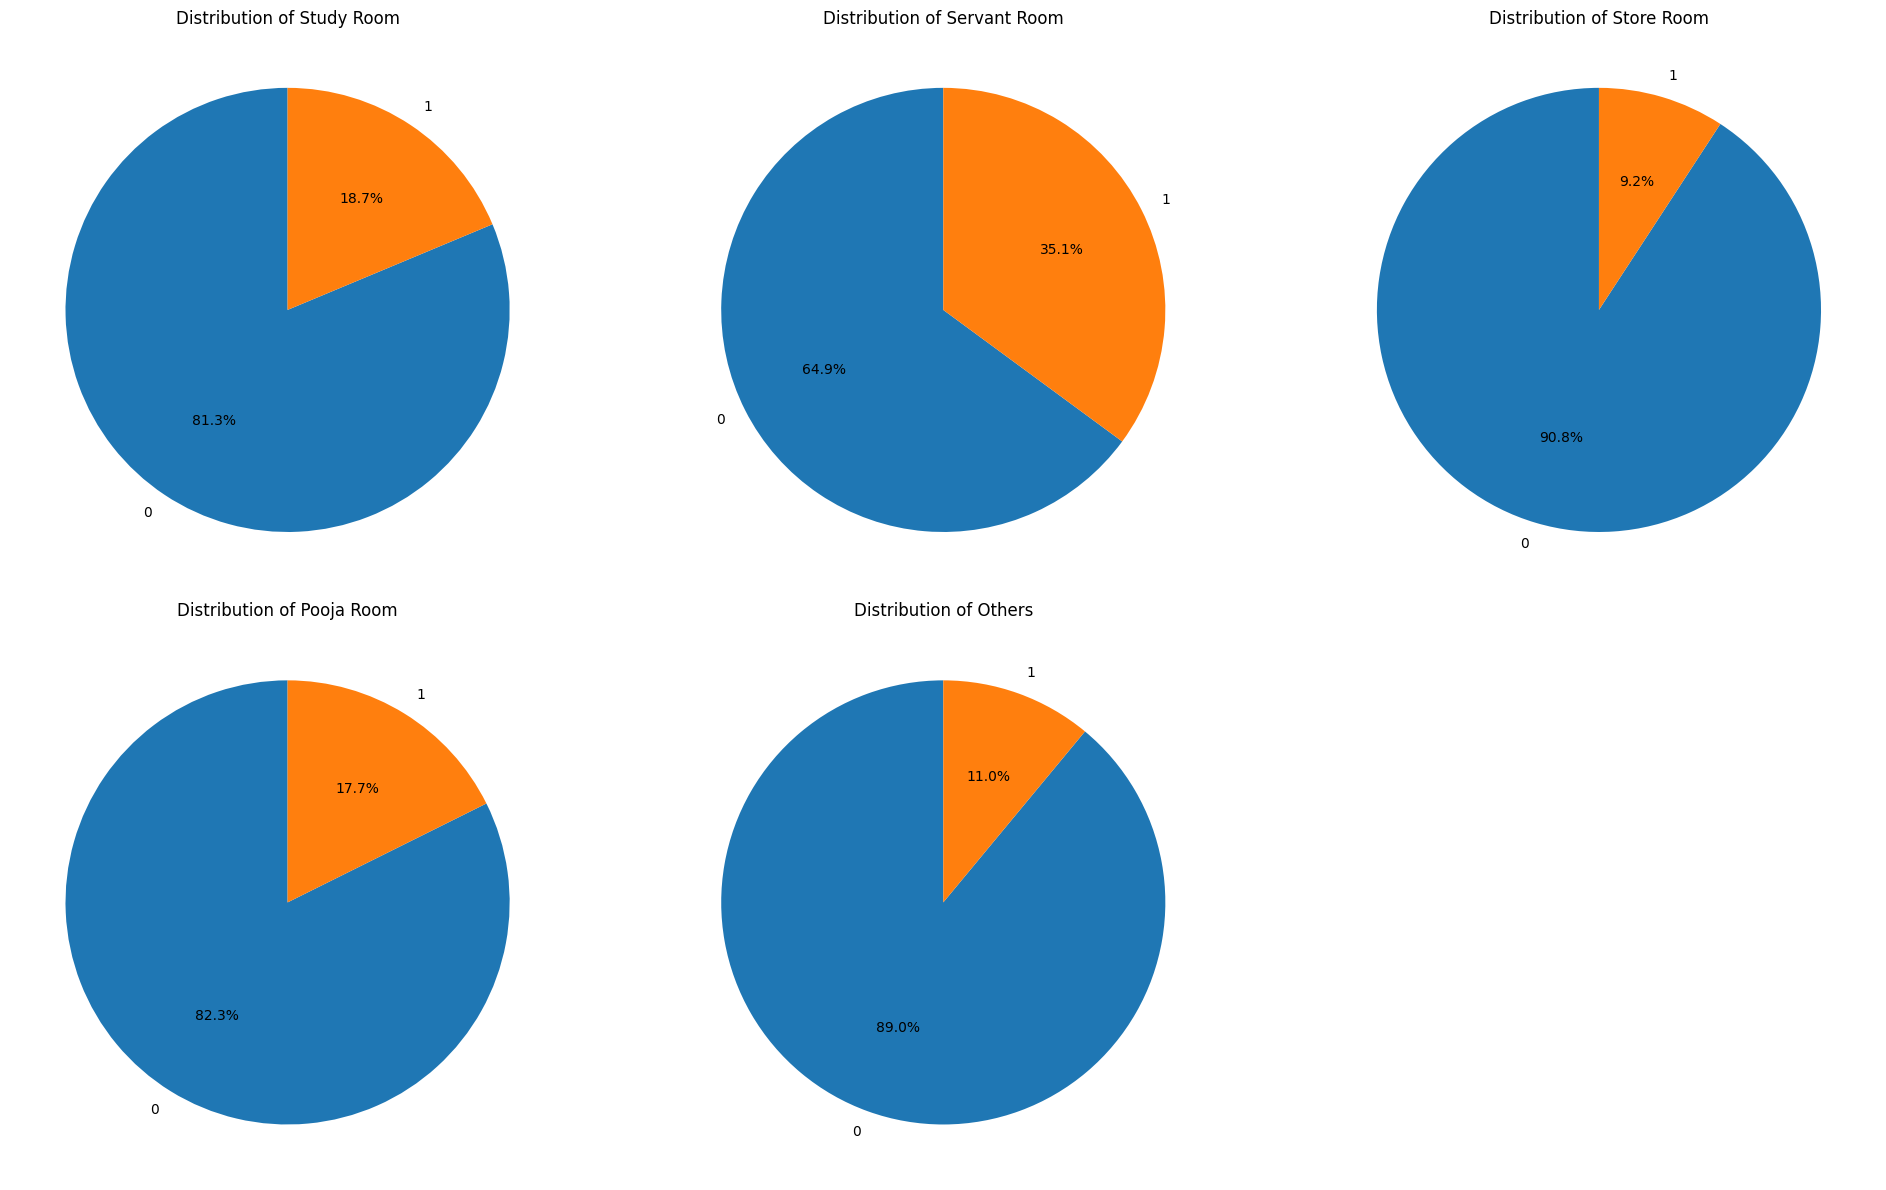

In [259]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# furnishing_type

In [260]:
df['furnishing_type'].value_counts()

furnishing_type
0    2524
1    1076
2     213
Name: count, dtype: int64

<Axes: ylabel='count'>

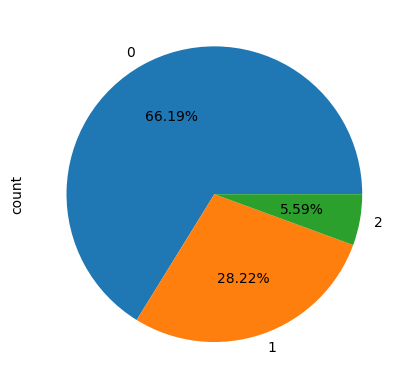

In [261]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# luxury score

In [262]:
df['luxury_score'].isnull().sum()


0

In [263]:
df['luxury_score'].describe()

count    3813.000000
mean       69.650144
std        53.296679
min         0.000000
25%        28.000000
50%        56.000000
75%       108.000000
max       174.000000
Name: luxury_score, dtype: float64

In [282]:
fig1 = px.histogram(df['luxury_score'].dropna(),nbins=30,marginal='rug')
fig1.update_layout(bargap=0.05)

In [268]:
fig = px.box(df['luxury_score'].dropna(),orientation='h')
fig.show()

- Majority of the properties lie between the luxury score of 0 to 60
- Multi modal distributed data
- Two major peaks are at luxury score of 0-9 and 40-49
- IQR range of 28 - 118 luxury score indicates middle 50% values in this range